In [103]:
from cad.calc.loss import ScaleLoss, AmpLoss, CombinedLoss
from cad.calc.mutation import mutate_explore_then_finetune
from cad.calc.parameters import BasicShapeParameters
from cad.calc.htmlreport import make_html_report
from cad.calc.didgmo import PeakFile, didgmo_bridge, cleanup
from cad.calc.visualization import DidgeVisualizer, FFTVisualiser, visualize_geo_fft
import matplotlib.pyplot as plt
from cad.calc.conv import note_to_freq, note_name, freq_to_note
from cad.calc.geo import Geo
from cad.calc.parameters import BasicShapeParameters
from IPython.display import clear_output
import math
import random
import copy
from tqdm import tqdm
from threading import Lock, Thread
from multiprocessing import Pool
import concurrent.futures


<AxesSubplot:xlabel='x', ylabel='y'>

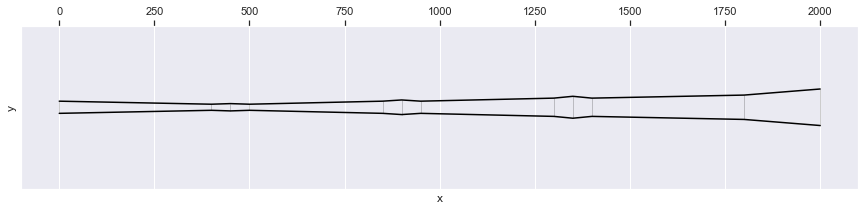

In [130]:
class WaveParameterSet(MutationParameterSet):
    
    def __init__(self):
        super(WaveParameterSet, self).__init__()
        
        self.mutable_parameters.append(MutationParameter("length", 2000, 1800, 2500))
        
        max_bubbles=5
        self.mutable_parameters.append(MutationParameter("n_bubbles", 3, 1, max_bubbles))
        
        for i in range(max_bubbles):
            self.mutable_parameters.append(MutationParameter(f"bubble_{i}_diameter", 1.2, 1.0, 1.5))
            self.mutable_parameters.append(MutationParameter(f"bubble_{i}_width", 50, 100, 200))     
            self.mutable_parameters.append(MutationParameter(f"bubble_{i}_pos_shift", 0, -100, 100))

        self.mutable_parameters.append(MutationParameter("d2", 2, 1.0, 3.0))
        self.mutable_parameters.append(MutationParameter("d3", 3, 1.0, 3.0))
        self.mutable_parameters.append(MutationParameter("bell_length", 200, 100, 300))
        self.immutable_parameters.append(MutationParameter("d1", 32))
        
    def make_geo(self):
        shape=[
            [0, self.get("d1").value]
        ]
        
        length_wb=self.get("length").value-self.get("bell_length").value
        
        d2=self.get("d1").value*self.get("d2").value
        
        alpha=math.atan(0.5*d2/length_wb)
        for i in range(self.get("n_bubbles").value):
            x2=self.get(f"bubble_{i}_pos_shift").value + length_wb*(i+1)/(self.get("n_bubbles").value+1)
            y2=self.get(f"bubble_{i}_diameter").value*2*math.tan(alpha)*x2
            x1=x2-self.get(f"bubble_{i}_width").value
            x3=x2+self.get(f"bubble_{i}_width").value
            y1=2*math.tan(alpha)*x2
            y3=2*math.tan(alpha)*x2
            shape.append([x1, y1])
            shape.append([x2, y2])
            shape.append([x3, y3])
            
        shape.append([length_wb, d2])        
        d3=self.get("d1").value*self.get("d3").value
        shape.append([self.get("length").value, d3])
        return Geo(geo=shape)

shape=WaveParameterSet()
DidgeVisualizer.vis_didge(shape.make_geo())
#for i in range(3):
#    geo=shape.make_geo()
#    shape.set(f"bubble_0_diameter", 1+i*0.3)
#    peak, fft=didgmo_bridge(geo)
#    print(peak.get_impedance_table())
#    print()
    #visualize_geo_fft(shape.make_geo())
    
    #print(shape.make_geo().geo)


<AxesSubplot:xlabel='x', ylabel='y'>

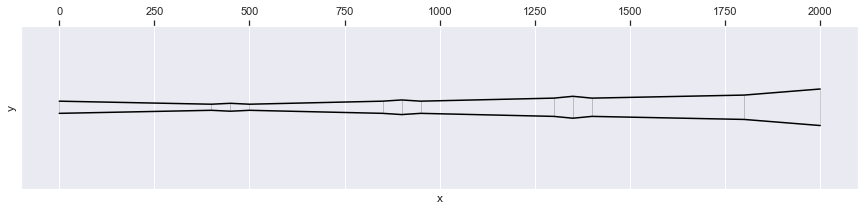

In [129]:
shape.set(f"bubble_0_diameter", 1.2)
DidgeVisualizer.vis_didge(geo)

In [ ]:
shape.set(f"bubble_0_diameter", 1.2)
DidgeVisualizer.vis_didge(geo)

In [39]:
mutator2=Mutator(mutant, loss, 200, n_poolsize=1, learning_rate=0.5, decrease_lr=True, show_progress=True, log_loss=True)
mutant2, loss2=mutator2.run()

peak, fft=didgmo_bridge(mutant2.make_geo())
peak.get_impedance_table()

100%|██████████| 200/200 [00:04<00:00, 42.43it/s]
